In [1]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
#TfidfVectorizer involves stopwords removal hence we dont need to import it explicitly 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
#We apply stemming as our final preprocessing step to our word vector




In [3]:
df = pd.read_csv("/Users/debdeepsanyal/Downloads/WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


We observe that we have null values in our dataset.

In [5]:
df = df.drop('Unnamed: 0', axis  = 1)

<Axes: >

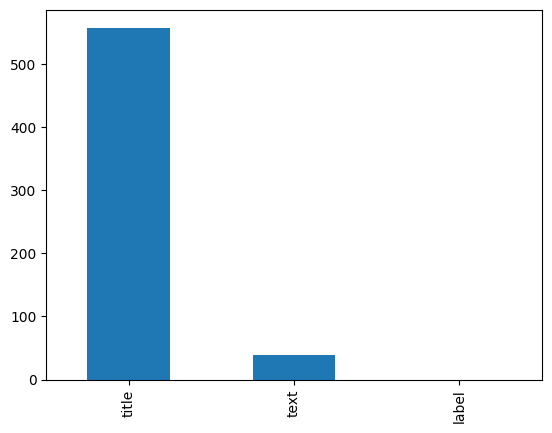

In [6]:
df.isnull().sum().plot(kind='bar')

In [7]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [8]:
df = df.fillna(' ')
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

All the null titles and texts have been imputed with a blank space.

In [9]:
df["title_text"] = df["title"] + df['text']
df['body_len'] = df['title_text'].apply(lambda x : len(x) - x.count(' '))
df.head(10)

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,152
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,68
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,Sports Bar Owner Bans NFL Games…Will Show Only...,1268
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1,Latest Pipeline Leak Underscores Dangers Of Da...,2593


In [10]:
print(max(df['body_len']))
print(min(df['body_len']))

122556
1


In [11]:
store = df[df['label']==0]['body_len']
print(np.mean(store))

2965.5684309695102


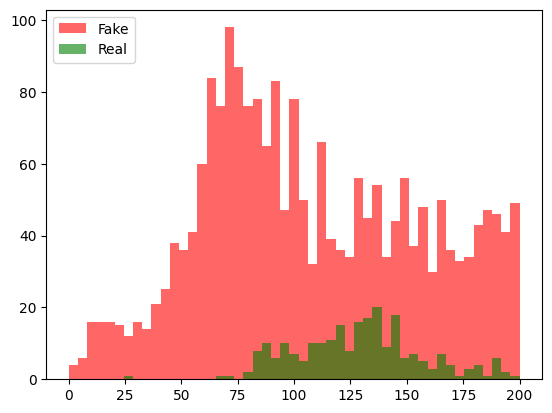

In [12]:
bins= np.linspace(0,200, 50)

plt.hist(df[df['label']==1]['body_len'], bins, alpha=0.6, label = 'Fake', color='red')
plt.hist(df[df['label']==0]['body_len'], bins, alpha=0.6, label = 'Real', color = 'green')
plt.legend(loc = 'upper left')
#plt.xscale('log')


a significant difference is observed in the distribution of fake and real news, which makes this new feature a useful one for classification.

In [45]:
x = df['title_text']
y = df['label']

In [18]:
type(x)

scipy.sparse._csr.csr_matrix

In [46]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
x = tfidf_vectorizer.fit_transform(x)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [48]:
cv = StratifiedKFold(shuffle=True, random_state=1)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
nb = MultinomialNB()
rf = RandomForestClassifier(n_jobs=-1)

cv_scores = cross_val_score(nb, x_train, y_train, cv = cv, n_jobs= -1)

cv_scores

array([0.92704904, 0.92730896, 0.92426999, 0.92565636, 0.92643618])

For Naive Bayes

In [49]:
cv_scores = cross_val_score(nb, x_train, y_train, cv = cv, n_jobs= -1)

cv_scores

array([0.89932421, 0.89637844, 0.89143055, 0.89446322, 0.90434104])

For Random Forests

In [50]:
cv_scores = cross_val_score(rf, x_train, y_train, cv = cv, n_jobs= -1)

cv_scores 

In [37]:
nb.fit(x_train, y_train)
predicted = nb.predict(x_test)
score = nb.score(x_test, y_test)
score

0.8716295834199764

In [38]:
classes = ['Fake', 'Real']

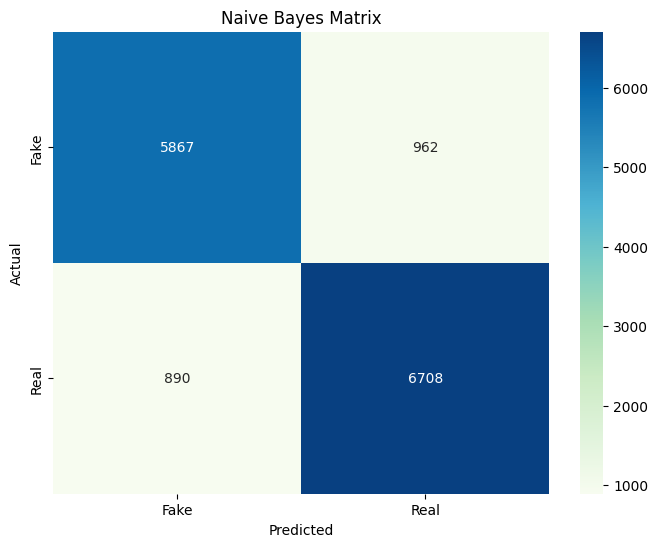

In [39]:
cm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=classes, yticklabels=classes)
plt.title('Naive Bayes Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6829
           1       0.87      0.88      0.88      7598

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427



In [41]:
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)
score = rf.score(x_test, y_test)
score

0.9295764885284536

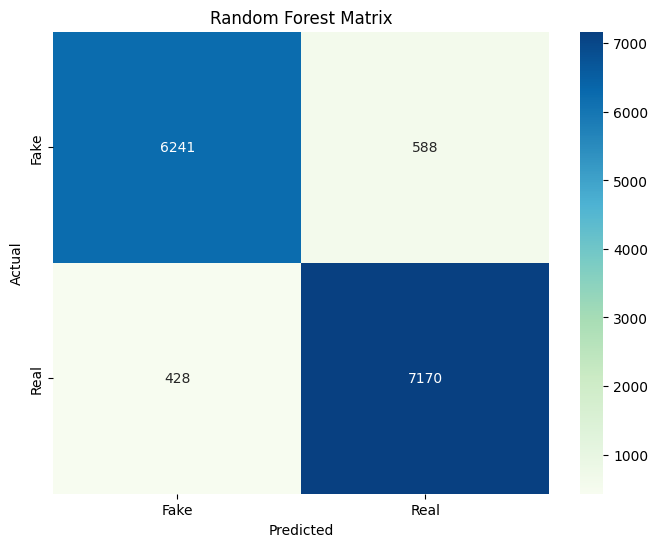

In [42]:
cm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=classes, yticklabels=classes)
plt.title('Random Forest Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      6829
           1       0.92      0.94      0.93      7598

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427

